In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pprint import pprint
import os
import pickle

In [2]:
"""
Input the unique ID
"""
UNIQUE_ID = "3:3"

In [3]:
def load_data_from_file(filename):
    if os.path.exists(filename):
        with open(filename, "rb") as f:
            return pickle.load(f)
    else:
        return None

In [4]:
def find_real_value(target, data):
    return [key for key, value in rc_data_index_map[target].items() if value == data][0]

In [5]:
def rc_int2str(number):
    string = ""

    while number > 0:
        remainder = number % 100
        ch = chr(remainder)
        string = ch + string
        number //= 100   
    return string

def rc_str2int(string):
    value = 0
    for index, ch in enumerate(string.upper()):
        value += ord(ch) * (10 ** ((len(string) - index - 1) * 2))
    return value

In [6]:
train_data = np.load(f"/mdfsvc/SDMS/data/numpy/receive_checker_train_combined_data_{UNIQUE_ID}.npy")

In [7]:
# Define column names
columns = ["exnm", "code", "type", "T_class", "wday", "receive_count"]

# Convert train data to DataFrame
train_df = pd.DataFrame(train_data, columns=columns)

train_df["exnm"] = train_df["exnm"].apply(rc_int2str)
train_df["code"] = train_df["code"].apply(rc_int2str)
train_df["type"] = train_df["type"].apply(rc_int2str)

# Display train data
train_df

,exnm,code,type,T_class,wday,receive_count
0,FSGX,UCJ4,DEPTH,669,4,40
1,FSGX,KUJ4,DEPTH,669,4,11
2,FSGX,KRWK4,DEPTH,669,4,12
3,FSGX,KRWJ4,DEPTH,669,4,6
4,FSGX,IUJ4,DEPTH,669,4,14
5,FSGX,IUJ4,QUOTE,669,4,13
6,FSGX,UCM4,DEPTH,669,4,40
7,FSGX,UCN4,DEPTH,669,4,23
8,FSGX,UCM5,DEPTH,669,4,15
9,FSGX,UCK4,DEPTH,669,4,26


In [8]:
anomaly_data_exists = True
try:
    anomaly_data = np.load(f"/mdfsvc/SDMS/data/numpy/receive_checker_anomly_combined_data_{UNIQUE_ID}.npy")

    if anomaly_data.size <= 0:
        anomaly_data_exists = False
except FileNotFoundError:
    anomaly_data_exists = False

anomaly_data_exists

False

In [9]:
# Perform PCA(3D)
pca = PCA(n_components=3)
scaler = StandardScaler()
X = scaler.fit_transform(train_data)
train_data_pca = pca.fit_transform(X)

columns = ["Com1", "Com2", "Com3"]
train_pca_df = pd.DataFrame(train_data_pca, columns=columns)
train_pca_df.head()

,Com1,Com2,Com3
0,-2.113291,0.680178,0.793565
1,-0.262678,0.381545,-0.865349
2,0.212483,-1.333441,0.106929
3,0.595514,-1.395694,-0.236047
4,-0.454337,0.413131,-0.694105


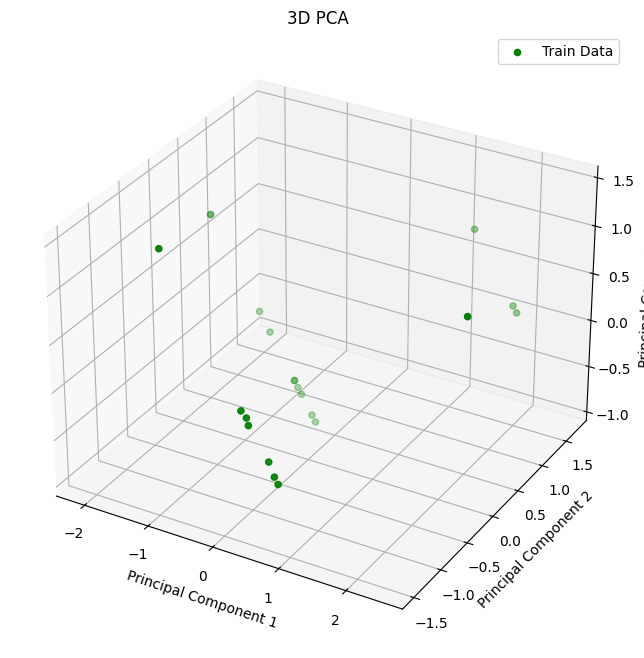

In [10]:
# Plot train data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_data_pca[:, 0], train_data_pca[:, 1], zs=train_data_pca[:, 2], c='green', marker='o', lw=1, label='Train Data')

# Plot anomaly data if exists
if anomaly_data_exists:
    XX = scaler.fit_transform(anomaly_data)
    anomaly_data_pca = pca.transform(XX)
    ax.scatter(anomaly_data_pca[:, 0], anomaly_data_pca[:, 1], anomaly_data_pca[:, 2], c='red', marker='x', label='Anomaly Data')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA')
plt.legend()
plt.show()

In [11]:
# Perform PCA(2D)
pca = PCA(n_components=2)
scaler = StandardScaler()
X = scaler.fit_transform(train_data)
train_data_pca = pca.fit_transform(X)

columns = ["Com1", "Com2"]
train_pca_df = pd.DataFrame(train_data_pca, columns=columns)
train_pca_df.head()

,Com1,Com2
0,-2.113291,0.680178
1,-0.262678,0.381545
2,0.212483,-1.333441
3,0.595514,-1.395694
4,-0.454337,0.413131


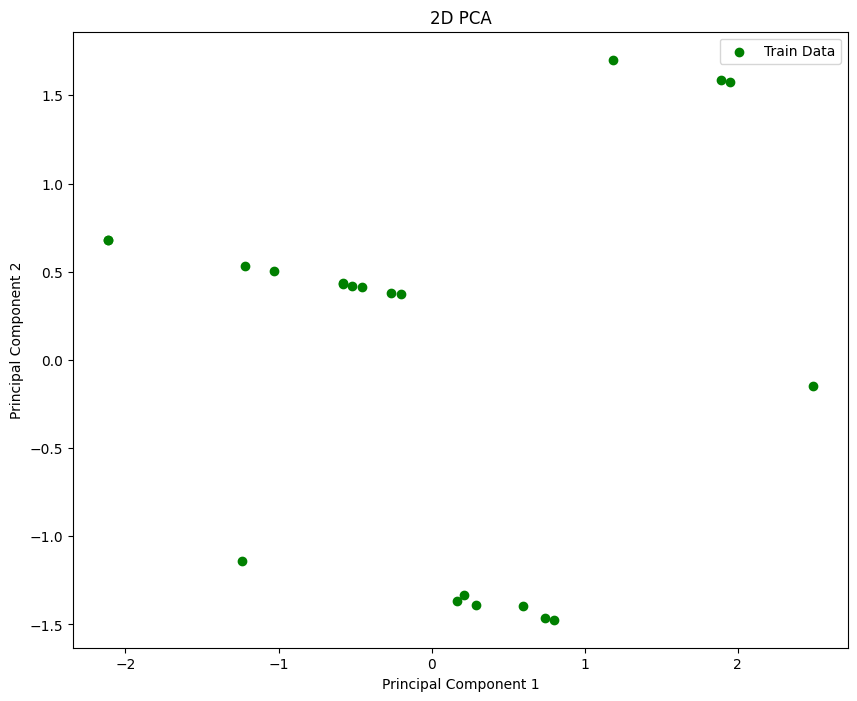

In [12]:
# Plot train data
plt.figure(figsize=(10, 8))
plt.scatter(train_data_pca[:, 0], train_data_pca[:, 1], c='green', marker='o', lw=1, label='Train Data')

# Plot anomaly data if exists
if anomaly_data_exists:
    anomaly_data_pca = pca.transform(anomaly_data)
    plt.scatter(anomaly_data_pca[:, 0], anomaly_data_pca[:, 1], c='red', marker='x', label='Anomaly Data')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.legend()
plt.show()